# **<center>Регрессия</center>**

В категории обучения с учителем модели можно условно разделить на следующие основные типы:

* **Линейные модели**: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
* **«Древесные» модели**: дерево решений и производные от него. 
* **Метрические алгоритмы**: метод ближайших соседей и производные от него.
* **Байесовские методы**: метод наивного Байеса и производные от него.
* **Ансамблевые методы**: композиции из методов (бэггинг, стекинг, бустинг).

## <center>Линейная регрессия</center>

**Линейные модели** — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

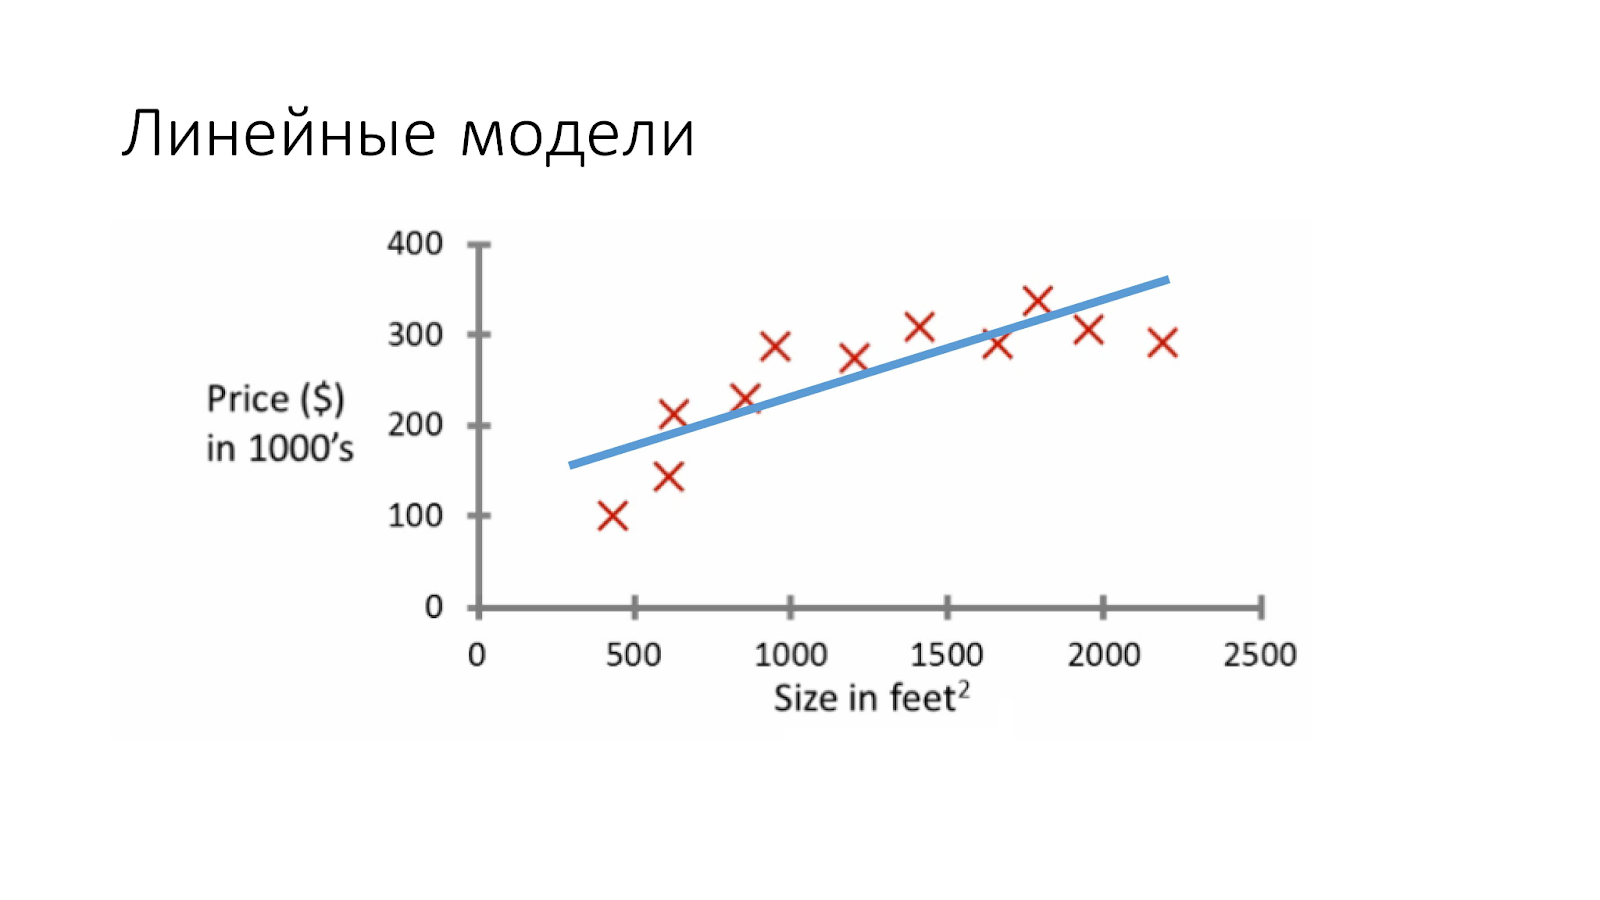

Все алгоритмы линейных моделей содержатся в библиотеке [sklearn](https://scikit-learn.ru/1-1-linear-models/)

**Линейная регрессия (Linear Regression)** — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

Общий вид модели в случае, когда целевая переменная зависит от  факторов, будет иметь следующий вид:

$$ \widehat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + \dots + w_{m}x_{m} $$

### 2D-случай

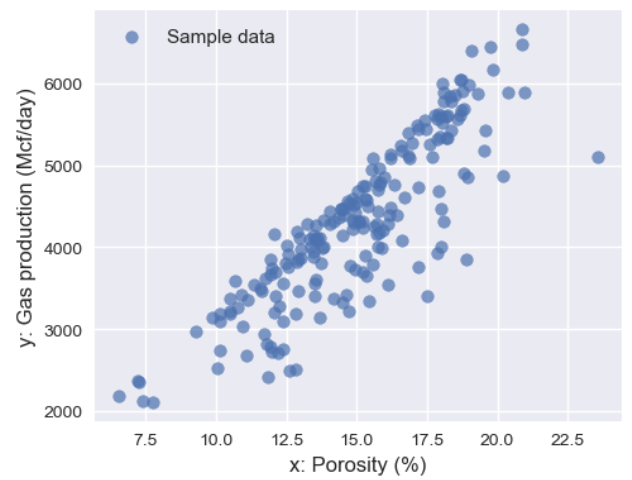

Из диаграммы отчётливо видно, что с ростом пористости скважины растёт добыча газа. Причём растёт она преимущественно линейно: основная масса точек находится на одной прямой.

Уравнение прямой:

$$ y = kx + b $$
где:
* $x$ — это некоторый фактор, от которого зависит целевая переменная $y$. В нашем случае, $x$ — это пористость скважины, а $y$ — добыча газа
* $k$ — коэффициент наклона прямой (тангенс угла наклона). Если $k > 0$, это означает, что угол наклона прямой острый и прямая возрастает. Если $k < 0$, угол наклона тупой и прямая убывает.
* $b$ — коэффициент смещения прямой по оси $y$. Он будет соответствовать значению $y$ при $x = 0$. То есть это точка пересечения прямой и оси $Y$.

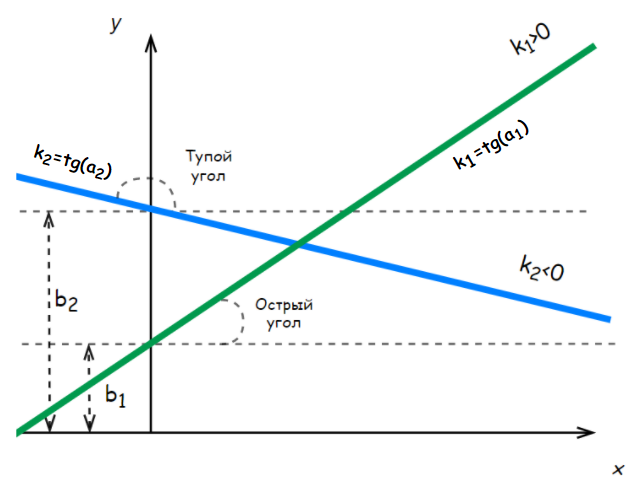

Однако в машинном обучении приняты немного другие обозначения. Фактическое значение целевой переменной обозначается как $y$, а вот предсказанное моделью — $\widehat{y}$. Также для удобства коэффициенты $b$ и $k$ приведём к единому обозначению: $w_{0} = b$ и $w_{1} = k$. Тогда уравнение модели линейной регрессии запишется в виде:

$$ \widehat{y} = w_{0} + w_{1}x $$

> Коэффициенты $w_{0}$ и $w_{1}$ называются **параметрами линейной регрессии**.

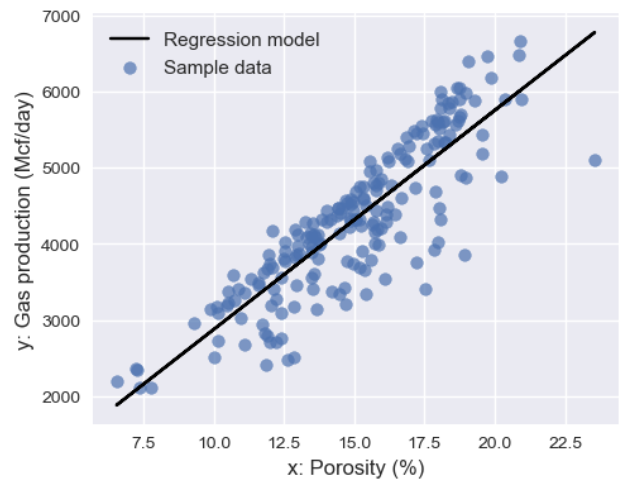

### 3D-случай

Теперь представим, что у нас не один фактор, а два. Например, помимо пористости скважины, мы дополнительно знаем ещё и о её хрупкости в процентах. То есть у нас теперь есть два фактора: $x_{1}$  — пористость и $x_{2}$  — хрупкость.

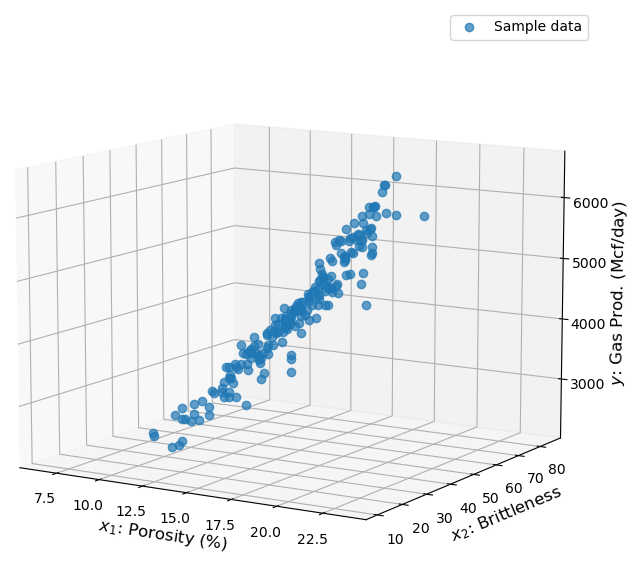

В таком случае в выражение для модели добавится ещё одна переменная:

$$ \widehat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} $$

Например, $ w_{0} = -2003; w_{1} = 302.2; w_{2} = 31.38 $

Тогда модель будет иметь следующий вид:

$$ \widehat{y} = 302.3x_{1} + 31.38x_{2} - 2003 $$

Это была алгебра — теперь перейдём к геометрии. Геометрически данное уравнение описывает плоскость в трёхмерном пространстве с осями $x_{1}$ и $x_{2}$, $w_{0}$ — смещение плоскости по вертикальной оси, а коэффициенты $w_1$ и $w_2$ — коэффициенты наклона этой плоскости к осям $x_1$ и $x_2$. 

То есть это будет плоскость, которая подстроена под точки в трёхмерном пространстве:

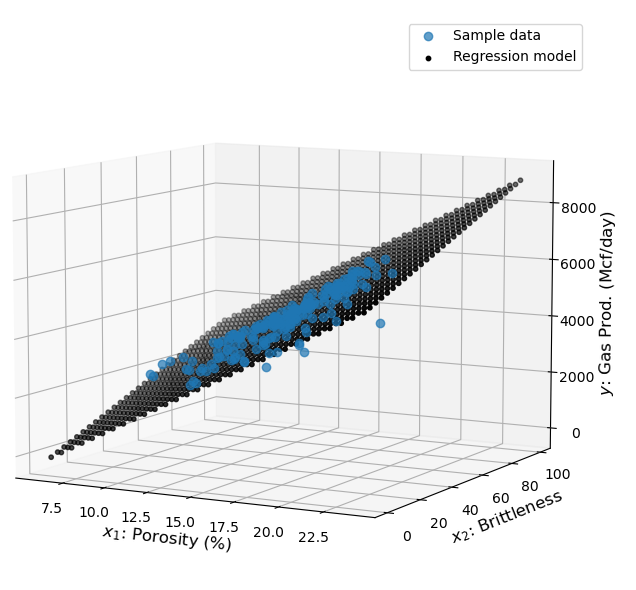

### Общий случай

А что если факторов не два, а больше: 3, 15, 100? Тут-то мы и приходим к общему виду модели линейной регрессии, который вводили в самом начале. Пусть у нас есть $m$ факторов $\{x_1, x_2, \dots, x_m\}$, от которых зависит целевая переменная $y$.

$$ \widehat{y} = w_0 + w_1x_1 + w_2x_2 + \dots + w_mx_m = w_0 + \sum^{m}_{j=1}w_jx_j $$

В геометрическом смысле данное уравнение описывает плоскость в $(m+1)$-мерном пространстве ($m$ факторов + 1 целевой признак отложены по осям координат). Такую плоскость называют **гиперплоскостью**.

## <center>Поиск параметров линейной регрессии. Метод наименьших квадратов</center>

Прямую же можно провести как угодно. Вот например несколько прямых, построенных с различными случайными коэффициентами:

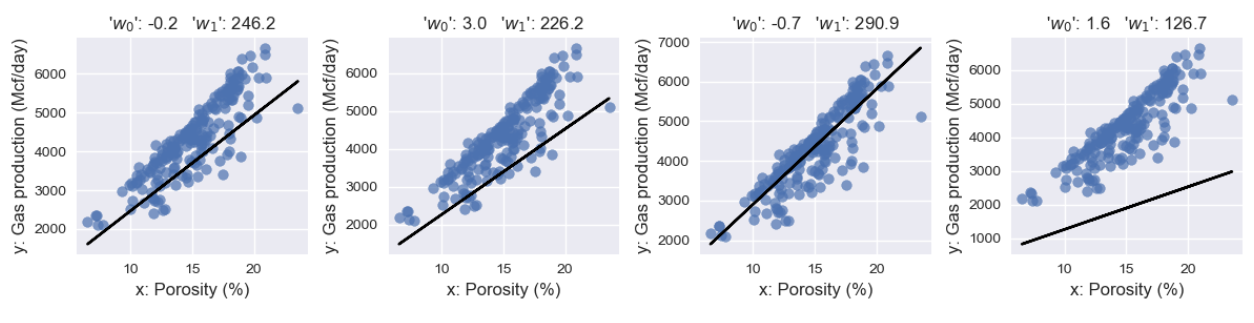

Где взять функцию ошибки, согласно схеме обучения модели?

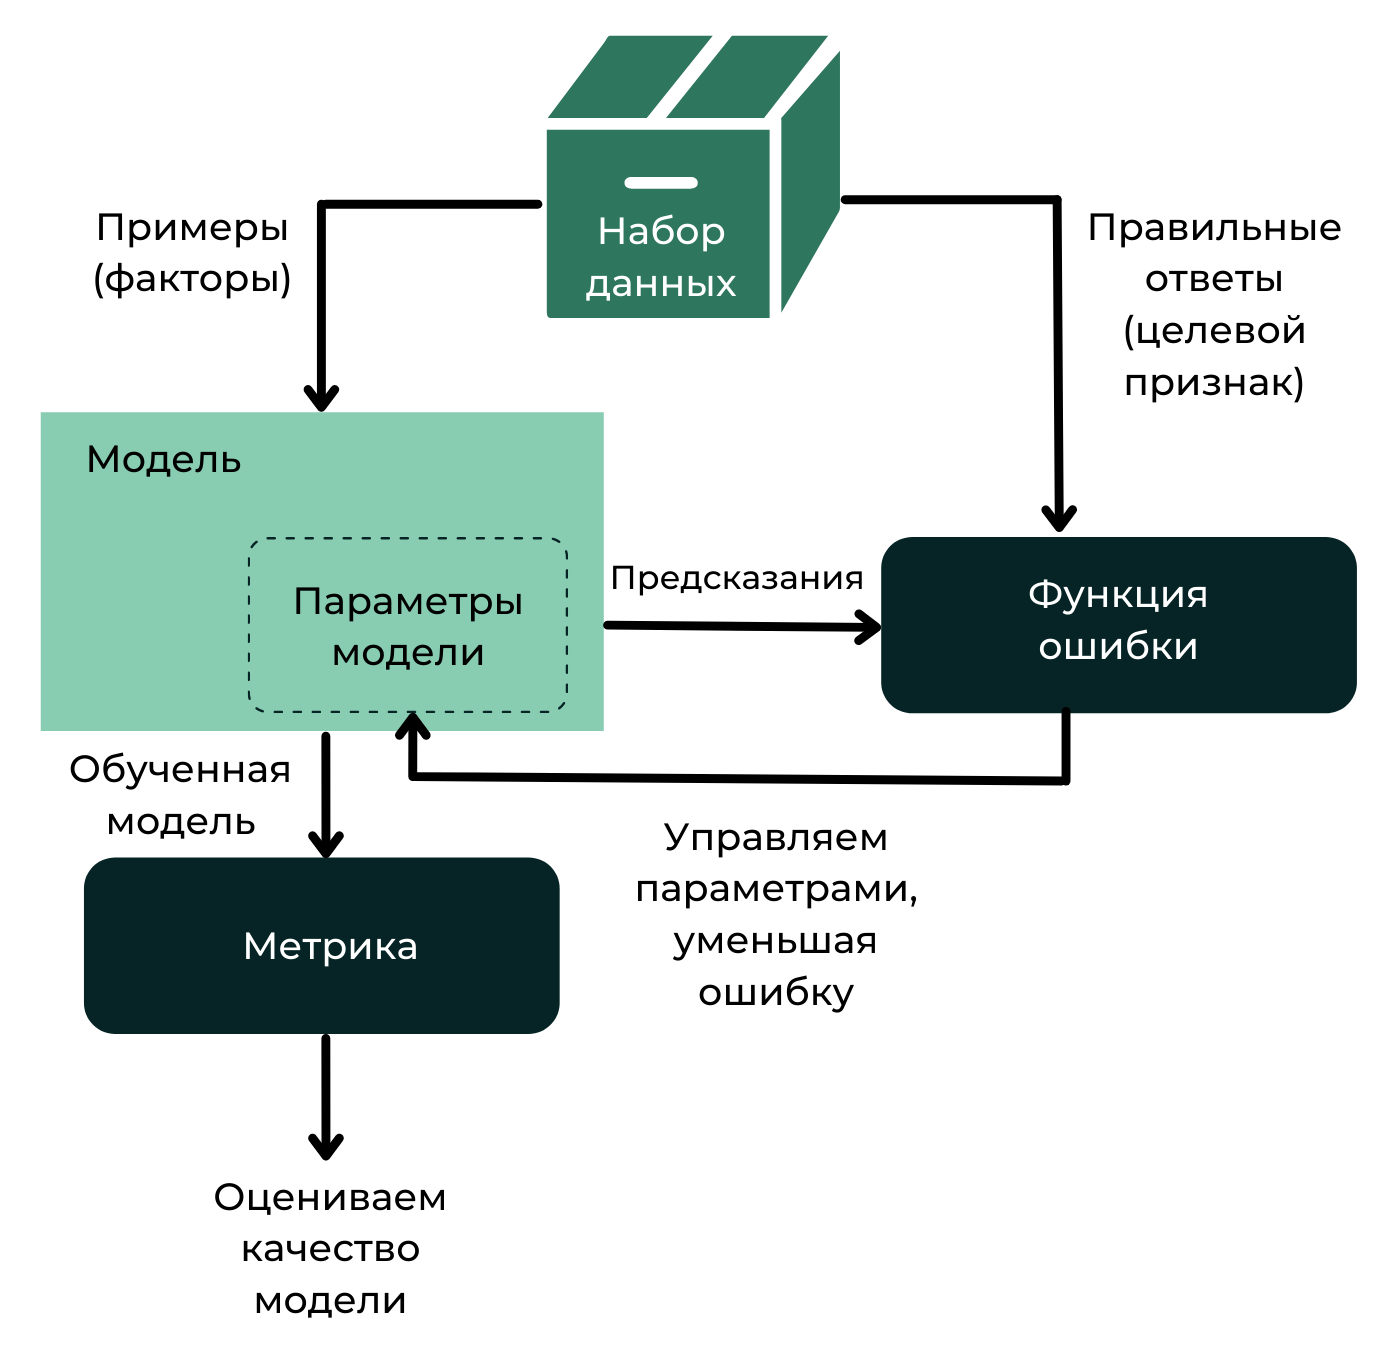

Как могла бы выглядеть прямая в двумерном пространстве, проведённая, например, через пять точек:

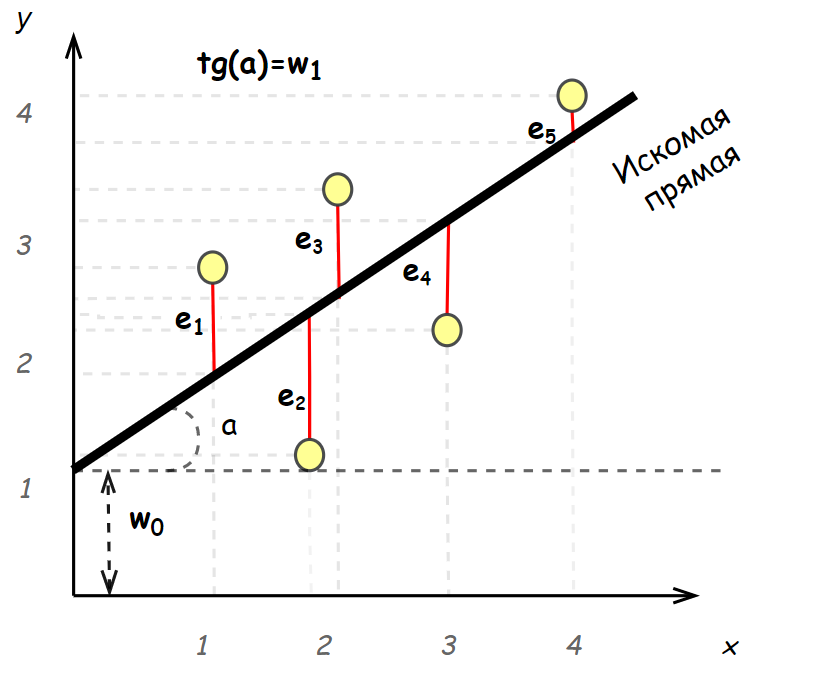

> Что вообще есть ошибка? В самом простом понимании это расхождение между истиной и предсказанием.

Чтобы не учитывать знак расхождения, можно взять модуль разницы между истинным значением и предсказанным (тем, что лежит на прямой). Рассчитать ошибки $e_i$ (на рисунке они отмечены красными отрезками) для всех пяти точек можно следующим образом:

$$ e_i = |y_i - \widehat{y}_i| $$

где $y_i$ — это результат подстановки $i$-ого значения $x$ в модель линейной регрессии.

Вычислим среднее по всем ошибкам. Такая ошибка называется **средняя абсолютная ошибка (Mean Absolute Error, MAE)** и записывается следующим образом (в двумерном случае):

$$
MAE = \frac{\sum^{n}_{i=1}e_i}{n} = \frac{\sum^{n}_{i=1}|y_i - \widehat{y}_i|}{n} = \frac{\sum^{n}_{i=1}|y_i - w_0 - w_1x_i|}{n}
$$

Осталось только найти такие $w_0$ и $w_1$, при которых $MAE$ была бы минимальной. В математике это записывается следующим образом:

$$
MAE = \frac{\sum^{n}_{i=1}e_i}{n} = \frac{\sum^{n}_{i=1}|y_i - \widehat{y}_i|}{n} = \frac{\sum^{n}_{i=1}|y_i - w_0 - w_1x_i|}{n} \to min_{w}
$$

>Функция модуля является недифференцируемой в точке 0, то есть не имеет производной. Классическая оптимизационная задача решается через равенство производной функции нулю. Поиск производной может обернуться математическим противоречием.
Проблему с MAE можно решить, но всё же она используется гораздо реже.

Вместо модуля можно использовать квадрат — он тоже убирает знак ошибки и по сути аналогичен модулю. Получим **среднеквадратичную ошибку (Mean Square Error, MSE)**:

$$
MSE = \frac{\sum^{n}_{i=1}e^{2}_{i}}{n} = \frac{\sum^{n}_{i=1}(y_i - \widehat{y}_i)^2}{n} = \frac{\sum^{n}_{i=1}(y_i - w_0 - w_1x_i)^2}{n} \to min_{w}
$$

В **общем случае**, когда $X$ — это таблица из $n$ наблюдений и $m$ признаков, постановка задачи оптимизации $MSE$ выглядит следующим образом:

$$
MSE = \frac{\sum^{n}_{i=1}(y_i - \widehat{y}_i)^2}{n} = \frac{\sum^{n}_{i=1}(y_i - w_0 - \sum^{m}_{j=1}w_{j}x_{ij})^2}{n} \to min_{w}
$$

где $x_{ij}$ — это значение, которое находится в $i$-ой строке и $j$-ом столбце таблицы наблюдений.

Метод поиска параметров линейной регрессии называется **методом наименьших квадратов** (сокращённо — **МНК**) и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру **OLS (Ordinary Least Squares)**.

Итак, пусть у нас есть матрица $X$, в которой по строкам собрано $n$ наблюдений, а по столбцам отложено $m$ факторов — по сути, это обычный, привычный нам DataFrame. К каждому примеру из таблицы $X$ есть ответ $y$.

Зависимость между факторами и целевым признаком принята линейной, то есть рассматривается обучение модели линейной регрессии:

$\widehat{y} = w_0 + w_1x_1 + w_2x_2 + \dots + w_mx_m = \overline{w} \cdot \overline{x}$

$\overline{w} = (w_0, w_1, w_2, \dots, w_m)$ - вектор параметров

$\overline{x} = (1, x_1, x_2, \dots, x_m)$ - вектор признаков

> Для того чтобы конечная запись формулы была короче и можно было включить в вектор $\overline{w}$ коэффициент смещения прямой $w_0$, в матрицу $X$ первым добавляют столбец, полностью состоящий из единиц. Это связано со спецификой матричного умножения.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

$ \overline{w} = (X^TX)^{-1}X^Ty = QX^ty $

Данная матричная формула позволяет найти неизвестные параметры линейной регрессии в виде вектора $\overline{w} = (w_0, w_1, w_2, \dots, w_m)$. Найденные коэффициенты называют **решением задачи линейной регрессии**.

>Верхний индекс T у матрицы X означает транспонирование матриц — смену строк и столбцов местами (поворот таблицы). Пример:

$$
\begin{pmatrix}
    -2 & 3 & 1 \\
    0 & -1 & -3
\end{pmatrix}
=
\begin{pmatrix}
    -2 & 0 \\
    3 & -1 \\
    1 & -3
\end{pmatrix}
$$

Операция возведения матриц в степень -1 называется **обращением матриц**. Полученная в результате матрица называется **обратной** к исходной. Так, матрица $(X^TX)^{-1}$ является **обратной** к матрице $X^TX$.

